In [1]:
import wrapper
import tensorflow as tf
from tensorflow.core.example import example_pb2
import io
from PIL import Image
from matplotlib.pyplot import imshow
%matplotlib inline
import numpy as np

a = wrapper.Wrapper("discrete_tcnn1", 
            "data/discrete_tcnn1/model.ckpt-126001.bestmodel",
            20)

INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.
using Yang's load pretrained weights version
conv1 weights (11, 11, 3, 96)
weight decay inside network.py =  0.0
conv1 biases (96,)
[20, 55, 55, 96]
conv2 weights (5, 5, 48, 256)
weight decay inside network.py =  0.0
conv2 biases (256,)
[20, 27, 27, 256]
conv3 weights (3, 3, 256, 384)
weight decay inside network.py =  0.0
conv3 biases (384,)
[20, 13, 13, 384]
conv4 weights (3, 3, 192, 384)
weight decay inside network.py =  0.0
conv4 biases (384,)
[20, 13, 13, 384]
conv5 weights (3, 3, 192, 256)
weight decay inside network.py =  0.0
conv5 biases (256,)
[20, 13, 13, 256]
fc6 weights (9216, 4096)
weight decay inside network.py =  0.0
fc6 biases (4096,)
[20, 1, 1, 4096]
fc7 weights (4096, 4096)
weight decay inside network.py =  0.0
fc7 biases (4096,)
[20, 1, 1, 4096]
fc8 weights (4096, 1000)
weight decay inside network.py =  0.0
fc8 biases (1000,)
[20, 1, 1, 1000]
-----------------------------

In [2]:
example = example_pb2.Example()
in_file = "/home/ubuntu/samples-1k/tfrecords/08022699-d03af7f6.tfrecords"

count = 0
for example_serialized in tf.python_io.tf_record_iterator(in_file):
    example.ParseFromString(example_serialized)
    feature_map = example.features.feature
    encoded = feature_map['image/encoded'].bytes_list.value
    print(count)
    count += 1

0


only forward pass 1.3481991291046143
[array([[ 1.81182146,  2.07716513,  1.6369617 ,  4.12814426, -4.68583155,
        -4.85403299]], dtype=float32)]


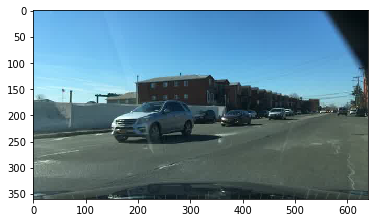

In [3]:
file_jpgdata = io.BytesIO(encoded[0])
dt = Image.open(file_jpgdata)
imshow(np.asarray(dt))
print(a.observe_a_frame(np.asarray(dt)))

In [4]:
for i in range(len(encoded)):
    if i % 5 == 0:
        file_jpgdata = io.BytesIO(encoded[0])
        dt = Image.open(file_jpgdata)
        arr = np.asarray(dt)
        out = a.observe_a_frame(arr)
        print(out)
        print(i/5)

only forward pass 1.3496742248535156
[array([[ 1.81182146,  2.07716513,  1.6369617 ,  4.12814426, -4.68583155,
        -4.85403299]], dtype=float32)]
0.0
only forward pass 1.3375020027160645
[array([[ 1.81182146,  2.07716513,  1.6369617 ,  4.12814426, -4.68583155,
        -4.85403299]], dtype=float32)]
1.0
only forward pass 1.7029461860656738
[array([[ 1.81182146,  2.07716513,  1.6369617 ,  4.12814426, -4.68583155,
        -4.85403299]], dtype=float32)]
2.0
only forward pass 1.3380634784698486
[array([[ 1.81182146,  2.07716513,  1.6369617 ,  4.12814426, -4.68583155,
        -4.85403299]], dtype=float32)]
3.0
only forward pass 1.3301753997802734
[array([[ 1.81182146,  2.07716513,  1.6369617 ,  4.12814426, -4.68583155,
        -4.85403299]], dtype=float32)]
4.0
only forward pass 1.3354465961456299
[array([[ 1.81182146,  2.07716513,  1.6369617 ,  4.12814426, -4.68583155,
        -4.85403299]], dtype=float32)]
5.0
only forward pass 1.344905138015747
[array([[ 1.81182146,  2.07716513,  1.63

only forward pass 1.3410265445709229
[array([[ 1.81182146,  2.07716513,  1.6369617 ,  4.12814426, -4.68583155,
        -4.85403299]], dtype=float32)]
53.0
only forward pass 1.3462677001953125
[array([[ 1.81182146,  2.07716513,  1.6369617 ,  4.12814426, -4.68583155,
        -4.85403299]], dtype=float32)]
54.0
only forward pass 1.3298795223236084
[array([[ 1.81182146,  2.07716513,  1.6369617 ,  4.12814426, -4.68583155,
        -4.85403299]], dtype=float32)]
55.0
only forward pass 1.3438804149627686
[array([[ 1.81182146,  2.07716513,  1.6369617 ,  4.12814426, -4.68583155,
        -4.85403299]], dtype=float32)]
56.0
only forward pass 1.332951545715332
[array([[ 1.81182146,  2.07716513,  1.6369617 ,  4.12814426, -4.68583155,
        -4.85403299]], dtype=float32)]
57.0
only forward pass 1.3377025127410889
[array([[ 1.81182146,  2.07716513,  1.6369617 ,  4.12814426, -4.68583155,
        -4.85403299]], dtype=float32)]
58.0
only forward pass 1.350377082824707
[array([[ 1.81182146,  2.07716513, 

only forward pass 1.3408935070037842
[array([[ 1.81182146,  2.07716513,  1.6369617 ,  4.12814426, -4.68583155,
        -4.85403299]], dtype=float32)]
106.0
only forward pass 1.3348495960235596
[array([[ 1.81182146,  2.07716513,  1.6369617 ,  4.12814426, -4.68583155,
        -4.85403299]], dtype=float32)]
107.0
